In [183]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [184]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [185]:
adaptive_thresh = cv2.adaptiveThreshold(
    image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 71, 21
)

In [186]:
edges = cv2.Canny(adaptive_thresh, 50, 150, apertureSize=3)

In [187]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

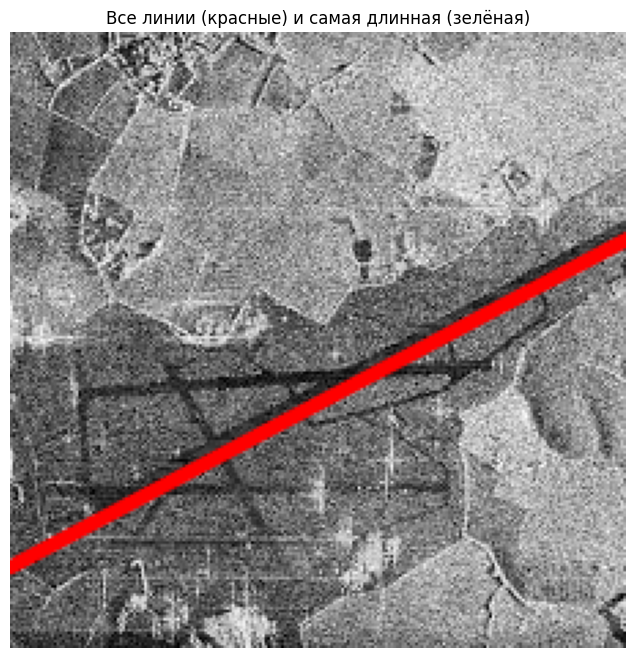

In [199]:
image_result = image.copy()
max_length = 0
longest_line = None
height, width = image_result.shape[:2]

if lines is not None:
    for line in lines:
        rho, theta = lines[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho

        # Ограничиваем координаты рамками изображения
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))

        # Вычисляем длину линии
        length = np.sqrt((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

        # Рисуем все линии тонкой красной линией
        cv2.line(image_result, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)

# Рисуем самую длинную линию зелёной
if longest_line is not None:
    image_with_line = image.copy()
    cv2.line(image_with_line, longest_line[0], longest_line[1], (0, 0, 255), 3, cv2.LINE_AA)

# Показываем результат
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
plt.title("Все линии (красные) и самая длинная (зелёная)")
plt.axis('off')
plt.show()

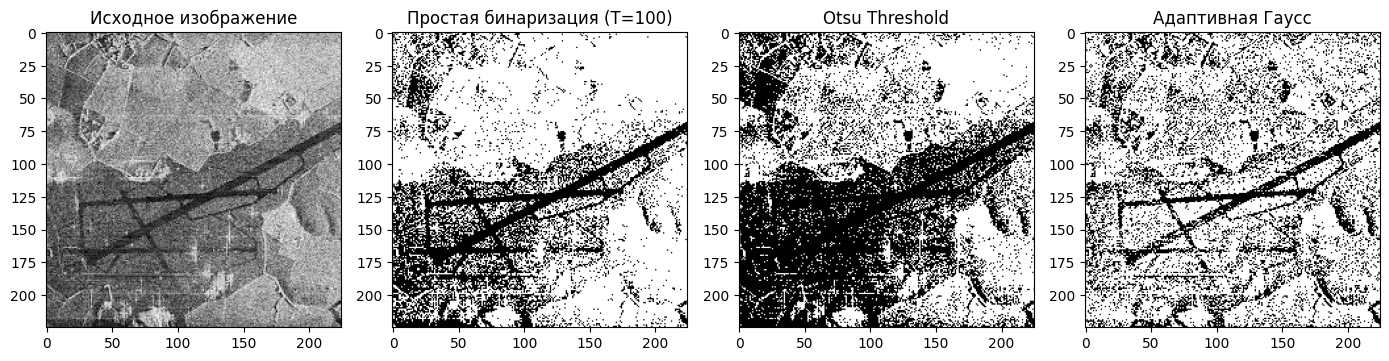

In [201]:
T = 100
_, simple_thresh = cv2.threshold(image_gray, T, 255, cv2.THRESH_BINARY)
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_gauss = cv2.adaptiveThreshold(
    image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 71, 21
)

plt.figure(figsize=(14,10))

plt.subplot(2,4,1)
plt.imshow(image_gray, cmap='gray')
plt.title("Исходное изображение")

plt.subplot(2,4,2)
plt.imshow(simple_thresh, cmap='gray')
plt.title("Простая бинаризация (T=100)")

plt.subplot(2,4,3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu Threshold")

plt.subplot(2,4,4)
plt.imshow(adaptive_gauss, cmap='gray')
plt.title("Адаптивная Гаусс")

plt.tight_layout()
plt.show()